# Data Analytics Dashboard for Coordinators

## The Coordinator can perform the following actions:

### (I) Look at the following tables:
- User Table which contains information about students, coordinators, their age, gender and the refugee camps they are based.
- Exam Table which contains information about the students' exam scores and their feedback
- Multiple Choice Questions (MCQ) Table which contains all the questions from second section, the true answers of the questions
- Answers of every student corresponding to every question from the MCQ section
- Truth Table containing answers of every student whether they were correct or not

### (II) Analysis of Exam Scores:
- Histogram plots for first, second, third section for the whole group 
- Identify which questions were the hardest 
- Average time taken to finish the exam
- Can indentify which students scored the highest and which students scored the least

### (III) Cheating Notification:
- A table is displayed if two students have exactly the same answers with exactly the same time taken to finish the exam

### (IV) Sentiment Analysis on Feedback provided by students:
- Sentiment Analysis is performed on the feedback text data provided by the students: Polarity for the text varies between -1 and +1 where +1 implies extremly positive and -1 implies extremly negative
- WordCloud corresponding to the most frequest used words in the feedback is shown

### (V) Enter and visualize Attendance:
- Coordinator can input the attendance percentage of a student and view a pie chart accordingly


# The code begins here:

In [1]:
#import required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import requests

## User Table

In [2]:
url = "https://inzone-c-parse.tools.deployimpact.ch/parse/users"
querystring = {"include":"refugeeCampId"}
payload = ""
headers = {
    'X-Parse-Application-Id': "inzonec"
    }
response = requests.request("GET", url, data=payload, headers=headers, params=querystring)
#print(response.text)

In [3]:
output = response.text

In [4]:
response_dict = json.loads(output)

In [5]:
df_response = pd.DataFrame(response_dict)

In [6]:
trial = []

In [7]:
for i in range(len(df_response)):
    ck = pd.DataFrame(df_response.results[i])
    trial.append(ck[ck.index == 'objectId'])
    
final_df_usertable = pd.concat(trial, ignore_index=True)


In [9]:
final_df_usertable

,objectId,username,phone,role,name,surName,createdAt,updatedAt,address,age,refugeeCampId,description,gender,ACL,emailVerified
0,e1lEFJC3hK,giada,415-392-0202,student,Giada,Fallo,2021-10-27T11:01:56.071Z,2021-11-19T20:08:08.991Z,4626 Elk Street Anaheim California 92805,19,RGDifmMQAi,highschool student,Female,NaN,NaN
1,aZ0gXwjlNK,namrata,415-392-0203,student,Namrata,Gurung,2021-10-27T11:04:59.861Z,2021-11-19T20:08:11.562Z,3166 Pine Street Sheakleyville Pennsylvania 16151,18,RGDifmMQAi,want to improve herself more in education,Female,NaN,NaN
2,Zs9uCTRg59,marta,415-392-0204,student,Marta,Bonilla,2021-10-27T11:05:42.396Z,2021-11-19T20:02:11.651Z,2419 Chipmunk Lane Portland Maine 04101,17,RGDifmMQAi,university student.,Female,NaN,NaN
3,zy2Iymim8g,gioele,415-392-0205,student,Gioele,Monopoli,2021-10-27T11:06:24.032Z,2021-11-19T20:02:13.932Z,4013 Augusta Park Mullens West Virginia 25882,16,RGDifmMQAi,no background on education.,Male,NaN,NaN
4,khUX3max7b,juliet,415-392-0206,student,Juliet,Gisemba,2021-10-27T11:07:53.454Z,2021-11-03T19:55:33.998Z,653 Arlington Avenue Little Rock AR Arkansas 7...,15,RGDifmMQAi,Highschool student with strong passion,Female,NaN,True
5,xo7xcIt3Yq,emrecan,415-392-0207,coordinator,Emrecan,Ozkan,2021-10-27T11:08:22.792Z,2021-11-11T08:17:06.241Z,3079 Flint Street,22,RGDifmMQAi,Highschool student with strong passion,Male,NaN,NaN
6,YJxMmeKFYG,karim,415-392-0207,coordinator,Karim,Tutor,2021-11-10T11:08:36.131Z,2021-11-11T08:17:19.394Z,359 Essex Court,21,RGDifmMQAi,Highschool student with strong passion,Male,NaN,NaN
7,vcM0w26xi6,zakia,415-392-0207,student,Zakia,Student,2021-11-10T11:08:53.952Z,2021-11-11T08:17:22.978Z,349 Rhapsody Street,20,RGDifmMQAi,Highschool student with strong passion,Female,NaN,NaN


## Exam Table

In [10]:
url = "https://inzone-c-parse.tools.deployimpact.ch/parse/classes/UserExam"
querystring = {"include":"userId", "include":"examId"}
payload = ""
headers = {
    'X-Parse-Application-Id': "inzonec"
    }
response = requests.request("GET", url, data=payload, headers=headers, params=querystring)
#print(response.text)

In [11]:
output = response.text

In [12]:
response_dict = json.loads(output)

In [13]:
df_response = pd.DataFrame(response_dict)

In [14]:
trial = []

In [15]:
for i in range(len(df_response)):
    ck = pd.DataFrame(df_response.results[i])
    trial.append(ck[ck.index == 'objectId'])
    
final_df_examtable = pd.concat(trial, ignore_index=True)


In [16]:
final_df_examtable

,objectId,thirdSection,userId,examId,createdAt,updatedAt,optionalFeedback,capstoneProjectTextFeedback,firstSection,secondSection,totalTimeToFinishSecondSection
0,MZiDmknBr3,100.0,vcM0w26xi6,1EKKLfkBDR,2021-11-11T08:18:24.227Z,2021-11-19T07:53:48.290Z,MCQ section was very hard! The live question s...,I am very very happy to finish this course.,60.0,80.0,8.0
1,CH0hVcqi5S,70.0,e1lEFJC3hK,1EKKLfkBDR,2021-11-19T07:31:58.321Z,2021-11-19T20:00:20.882Z,I have to work hard on those questions.,The course was awesome.,45.0,80.0,8.0
2,tNSNzAvzZi,65.0,khUX3max7b,1EKKLfkBDR,2021-11-19T19:55:37.807Z,2021-11-25T11:52:12.434Z,Neither good nor bad. It was a normal exam.,I am very happy to finish this course.,50.0,NaN,16.0
3,NOzD7Smsqe,55.0,zy2Iymim8g,1EKKLfkBDR,2021-11-19T20:03:28.131Z,2021-11-19T20:05:05.991Z,I had a hard time. Why did you ask so hard?,"Although the course was good, unfortunately I ...",35.0,40.0,17.0
4,ozC9SB1b0f,100.0,Zs9uCTRg59,1EKKLfkBDR,2021-11-19T20:06:44.311Z,2021-11-19T20:07:52.891Z,"Some questions were easy, some were hard. I di...",I am very happy to have finished this course. ...,75.0,80.0,15.0
5,1Bgpkc7lXt,40.0,aZ0gXwjlNK,1EKKLfkBDR,2021-11-19T20:09:45.272Z,2021-11-19T20:11:14.832Z,I'm not sure about some questions but I think ...,It was a better course than I thought. If I ha...,80.0,60.0,16.0
6,JTKBqDcMHA,NaN,vcM0w26xi6,HahVtDxtil,2021-11-25T10:45:56.701Z,2021-11-25T10:45:56.701Z,NaN,NaN,NaN,NaN,NaN


In [17]:
final_df_examtable["overall_score"] = final_df_examtable["firstSection"] + final_df_examtable["secondSection"] + final_df_examtable["thirdSection"]

In [18]:
final_df_examtable["overall_score_percentage"] = (final_df_examtable["overall_score"]/300) * 100

In [20]:
final_df_examtable

,objectId,thirdSection,userId,examId,createdAt,updatedAt,optionalFeedback,capstoneProjectTextFeedback,firstSection,secondSection,totalTimeToFinishSecondSection,overall_score,overall_score_percentage
0,MZiDmknBr3,100.0,vcM0w26xi6,1EKKLfkBDR,2021-11-11T08:18:24.227Z,2021-11-19T07:53:48.290Z,MCQ section was very hard! The live question s...,I am very very happy to finish this course.,60.0,80.0,8.0,240.0,80.000000
1,CH0hVcqi5S,70.0,e1lEFJC3hK,1EKKLfkBDR,2021-11-19T07:31:58.321Z,2021-11-19T20:00:20.882Z,I have to work hard on those questions.,The course was awesome.,45.0,80.0,8.0,195.0,65.000000
2,tNSNzAvzZi,65.0,khUX3max7b,1EKKLfkBDR,2021-11-19T19:55:37.807Z,2021-11-25T11:52:12.434Z,Neither good nor bad. It was a normal exam.,I am very happy to finish this course.,50.0,NaN,16.0,NaN,NaN
3,NOzD7Smsqe,55.0,zy2Iymim8g,1EKKLfkBDR,2021-11-19T20:03:28.131Z,2021-11-19T20:05:05.991Z,I had a hard time. Why did you ask so hard?,"Although the course was good, unfortunately I ...",35.0,40.0,17.0,130.0,43.333333
4,ozC9SB1b0f,100.0,Zs9uCTRg59,1EKKLfkBDR,2021-11-19T20:06:44.311Z,2021-11-19T20:07:52.891Z,"Some questions were easy, some were hard. I di...",I am very happy to have finished this course. ...,75.0,80.0,15.0,255.0,85.000000
5,1Bgpkc7lXt,40.0,aZ0gXwjlNK,1EKKLfkBDR,2021-11-19T20:09:45.272Z,2021-11-19T20:11:14.832Z,I'm not sure about some questions but I think ...,It was a better course than I thought. If I ha...,80.0,60.0,16.0,180.0,60.000000
6,JTKBqDcMHA,NaN,vcM0w26xi6,HahVtDxtil,2021-11-25T10:45:56.701Z,2021-11-25T10:45:56.701Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Average time taken to finish the exam

In [21]:
final_df_examtable["totalTimeToFinishSecondSection"].mean()

13.333333333333334

In [22]:
len(final_df_examtable)

7

In [23]:
final_df_examtable["gender"] = 0
final_df_examtable["age"] = 0
final_df_examtable["username"] = 0

In [24]:
for i in range(len(final_df_examtable)):
    for j in range(len(final_df_usertable)):
        if (final_df_examtable['userId'][i]==final_df_usertable["objectId"][j]):
            final_df_examtable["gender"][i] = final_df_usertable["gender"][j]
            final_df_examtable["age"][i] = final_df_usertable["age"][j]
            final_df_examtable["username"][i] = final_df_usertable["username"][j]

<ipython-input-24-56e3877e36bd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_examtable["gender"][i] = final_df_usertable["gender"][j]
C:\Users\namra\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-24-56e3877e36bd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_examtable["age"][i] = final_df_usertable[

In [25]:
final_df_examtable

,objectId,thirdSection,userId,examId,createdAt,updatedAt,optionalFeedback,capstoneProjectTextFeedback,firstSection,secondSection,totalTimeToFinishSecondSection,overall_score,overall_score_percentage,gender,age,username
0,MZiDmknBr3,100.0,vcM0w26xi6,1EKKLfkBDR,2021-11-11T08:18:24.227Z,2021-11-19T07:53:48.290Z,MCQ section was very hard! The live question s...,I am very very happy to finish this course.,60.0,80.0,8.0,240.0,80.000000,Female,20,zakia
1,CH0hVcqi5S,70.0,e1lEFJC3hK,1EKKLfkBDR,2021-11-19T07:31:58.321Z,2021-11-19T20:00:20.882Z,I have to work hard on those questions.,The course was awesome.,45.0,80.0,8.0,195.0,65.000000,Female,19,giada
2,tNSNzAvzZi,65.0,khUX3max7b,1EKKLfkBDR,2021-11-19T19:55:37.807Z,2021-11-25T11:52:12.434Z,Neither good nor bad. It was a normal exam.,I am very happy to finish this course.,50.0,NaN,16.0,NaN,NaN,Female,15,juliet
3,NOzD7Smsqe,55.0,zy2Iymim8g,1EKKLfkBDR,2021-11-19T20:03:28.131Z,2021-11-19T20:05:05.991Z,I had a hard time. Why did you ask so hard?,"Although the course was good, unfortunately I ...",35.0,40.0,17.0,130.0,43.333333,Male,16,gioele
4,ozC9SB1b0f,100.0,Zs9uCTRg59,1EKKLfkBDR,2021-11-19T20:06:44.311Z,2021-11-19T20:07:52.891Z,"Some questions were easy, some were hard. I di...",I am very happy to have finished this course. ...,75.0,80.0,15.0,255.0,85.000000,Female,17,marta
5,1Bgpkc7lXt,40.0,aZ0gXwjlNK,1EKKLfkBDR,2021-11-19T20:09:45.272Z,2021-11-19T20:11:14.832Z,I'm not sure about some questions but I think ...,It was a better course than I thought. If I ha...,80.0,60.0,16.0,180.0,60.000000,Female,18,namrata
6,JTKBqDcMHA,NaN,vcM0w26xi6,HahVtDxtil,2021-11-25T10:45:56.701Z,2021-11-25T10:45:56.701Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,20,zakia


# Analysis of the Exam Scores

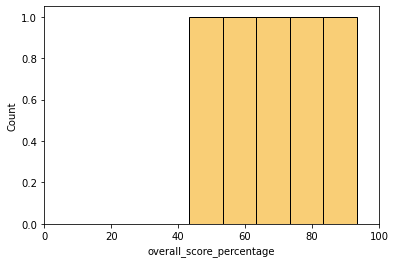

In [34]:
fig, ax = plt.subplots()
sns.histplot(data=final_df_examtable, x="overall_score_percentage", color="#F8BE48", binwidth=10, ax = ax)
ax.set_xlim(0,100)
plt.show()
#fig.savefig("overallscorepercentage.png")

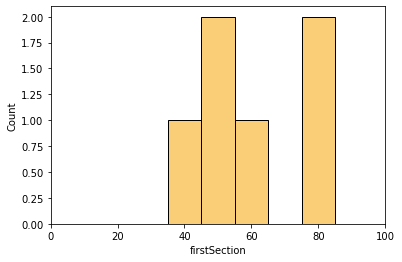

In [27]:
fig, ax = plt.subplots()
sns.histplot(data=final_df_examtable, x="firstSection", color="#F8BE48", binwidth=10)
ax.set_xlim(0,100)
plt.show()

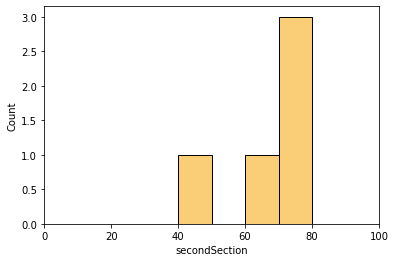

In [28]:
fig, ax = plt.subplots()
sns.histplot(data=final_df_examtable, x="secondSection", color="#F8BE48", binwidth = 10)
ax.set_xlim(0,100)
plt.show()

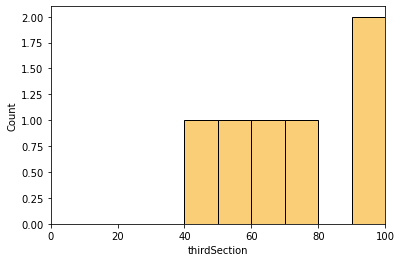

In [35]:
fig, ax = plt.subplots()
sns.histplot(data=final_df_examtable, x="thirdSection", color="#F8BE48", binwidth = 10)
ax.set_xlim(0,100)
plt.show()

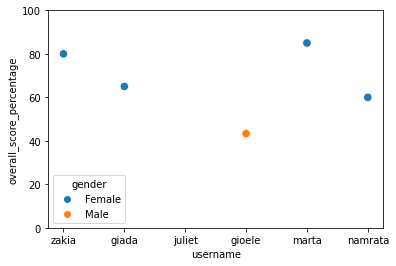

In [36]:
fig, ax = plt.subplots()
sns.scatterplot(data=final_df_examtable, x="username", y="overall_score_percentage", hue="gender", s = 70)
ax.set_ylim(0,100)
plt.show()
#fig.savefig("gender_marks.png")

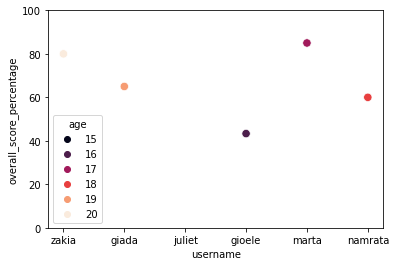

In [37]:
fig, ax = plt.subplots()
sns.scatterplot(data=final_df_examtable, x="username", y="overall_score_percentage", hue="age", s = 70, palette = "rocket")
ax.set_ylim(0,100)
plt.show()
fig.savefig("age_marks.png")

# Multiple Choice Questions Table

In [38]:
url = "https://inzone-c-parse.tools.deployimpact.ch/parse/classes/MultipleChoiceQuestion"
querystring = {}
payload = ""
headers = {
    'X-Parse-Application-Id': "inzonec"
    }
response = requests.request("GET", url, data=payload, headers=headers, params=querystring)
#print(response.text)

In [39]:
output = response.text

In [40]:
response_dict = json.loads(output)

In [41]:
df_response = pd.DataFrame(response_dict)

In [42]:
trial = []

In [43]:
for i in range(len(df_response)):
    ck = pd.DataFrame(df_response.results[i])
    trial.append(ck[ck.index == 'objectId'])
    
final_df_MCQtable = pd.concat(trial, ignore_index=True)


In [44]:
final_df_MCQtable

,objectId,answerA,question,answerB,answerC,answerD,trueAnswer,createdAt,updatedAt,examId,frenchQuestion,arabicQuestion,frenchAnswerA,arabicAnswerA,frenchAnswerB,arabicAnswerB,frenchAnswerC,arabicAnswerC,frenchAnswerD,arabicAnswerD
0,HZQ9LBYy07,4,What is 2 + 2?,2,3,1,1,2021-10-27T12:31:59.064Z,2021-10-28T07:54:20.256Z,1EKKLfkBDR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,XxfMEUBz2K,8,What is 4 + 4?,10,12,14,1,2021-10-27T12:42:19.886Z,2021-10-28T07:54:24.674Z,1EKKLfkBDR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KraRmlAdki,15,What is 5 + 5?,20,5,10,4,2021-10-27T12:43:11.208Z,2021-10-28T07:54:21.728Z,1EKKLfkBDR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4qItIo2aSp,12,What is 8 + 5?,13,16,25,2,2021-10-27T12:43:47.227Z,2021-10-28T07:54:28.196Z,1EKKLfkBDR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A7VehTbDkj,36,What is 10 + 4?,20,14,25,3,2021-10-28T07:54:00.535Z,2021-10-29T08:44:04.911Z,1EKKLfkBDR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,7ZNhhaVwlC,twelve,What is 6 + 6?,ten,nine,eight,1,2021-11-25T09:37:08.545Z,2021-11-25T09:37:08.545Z,undefined,Qu'est-ce que 6 + 6 ?,Ù Ø§ ÙÙ 6 + 6Ø,Douze,Ø§Ø«ÙÙ Ø¹Ø´Ø±,Dix,Ø¹Ø´Ø±Ø©,neuf,ØªØ³Ø¹,huit,Ø«Ù Ø§ÙÙØ©
6,c2l2LxWucx,four,What is 5 + 5?,twelve,ten,nine,3,2021-11-25T09:37:08.551Z,2021-11-25T09:37:08.551Z,undefined,Qu'est-ce que 5 + 5 ?,Ù Ø§ ÙÙ 5 + 5Ø,quatre,Ø£Ø±Ø¨Ø¹Ø©,Douze,Ø§Ø«ÙÙ Ø¹Ø´Ø±,Dix,Ø¹Ø´Ø±Ø©,neuf,ØªØ³Ø¹
7,8UB3ZCHsMP,sixteen,What is 10 + 10?,twenty,two,three,2,2021-11-25T09:37:08.553Z,2021-11-25T09:37:08.553Z,undefined,Qu'est-ce que 10 + 10 ?,Ù Ø§ ÙÙ 10 + 10Ø,seize,Ø§ÙØ³Ø§Ø¯Ø³ Ø¹Ø´Ø±,vingt,Ø¹Ø´Ø±ÙÙ,deux,Ø§Ø«ÙÙÙ,Trois,Ø«ÙØ§Ø«Ø©


# MCQ answers of all users

In [45]:
url = "https://inzone-c-parse.tools.deployimpact.ch/parse/classes/UserMCQAnswer"
querystring = {}
payload = ""
headers = {
    'X-Parse-Application-Id': "inzonec"
    }
response = requests.request("GET", url, data=payload, headers=headers, params=querystring)
#print(response.text)

In [46]:
output = response.text

In [47]:
response_dict = json.loads(output)

In [48]:
df_response = pd.DataFrame(response_dict)

In [49]:
trial = []

In [50]:
for i in range(len(df_response)):
    ck = pd.DataFrame(df_response.results[i])
    trial.append(ck[ck.index == 'objectId'])
    
final_df_MCQAns = pd.concat(trial, ignore_index=True)

In [51]:
final_df_MCQAns

,objectId,answer,howManySecondsPassed,questionId,userId,createdAt,updatedAt
0,V5CJCArRvZ,1,1,HZQ9LBYy07,vcM0w26xi6,2021-11-18T14:07:47.456Z,2021-11-18T14:07:47.456Z
1,DrGD2RUHdP,2,2,XxfMEUBz2K,vcM0w26xi6,2021-11-18T14:07:49.346Z,2021-11-18T14:07:49.346Z
2,aNQ78oBfPi,4,1,KraRmlAdki,vcM0w26xi6,2021-11-18T14:07:50.776Z,2021-11-18T14:07:50.776Z
3,tMTWPB61Dy,2,2,4qItIo2aSp,vcM0w26xi6,2021-11-18T14:07:52.318Z,2021-11-18T14:07:52.318Z
4,gG2gDSn6t1,3,2,A7VehTbDkj,vcM0w26xi6,2021-11-18T14:07:54.546Z,2021-11-18T14:07:54.546Z
5,eInMMXdyPf,1,1,HZQ9LBYy07,e1lEFJC3hK,2021-11-19T07:45:27.348Z,2021-11-19T07:45:48.550Z
6,WYQ9CeFxHz,2,2,XxfMEUBz2K,e1lEFJC3hK,2021-11-19T07:45:28.909Z,2021-11-19T07:45:28.909Z
7,JiA6gQ35zA,4,1,KraRmlAdki,e1lEFJC3hK,2021-11-19T07:45:32.939Z,2021-11-19T07:45:50.049Z
8,GU8WxVdWGK,2,2,4qItIo2aSp,e1lEFJC3hK,2021-11-19T07:45:34.621Z,2021-11-19T07:45:59.455Z
9,DQTLDSGooC,3,2,A7VehTbDkj,e1lEFJC3hK,2021-11-19T07:45:36.899Z,2021-11-19T07:45:36.899Z


In [52]:
questions = final_df_MCQAns['questionId'].unique()

In [53]:
questions

array(['HZQ9LBYy07', 'XxfMEUBz2K', 'KraRmlAdki', '4qItIo2aSp',
       'A7VehTbDkj'], dtype=object)

In [54]:
users = final_df_MCQAns['userId'].unique()

In [55]:
users

array(['vcM0w26xi6', 'e1lEFJC3hK', 'zy2Iymim8g', 'Zs9uCTRg59',
       'aZ0gXwjlNK'], dtype=object)

In [56]:
w, h = len(questions), len(users)
Matrix = [[0 for x in range(w)] for y in range(h)] 

In [57]:
for i in range(h):
    for j in range(w):
        row = final_df_MCQAns[(final_df_MCQAns['questionId']==questions[j]) & (final_df_MCQAns['userId']==users[i])]
        if not row.empty:
            Matrix[i][j] = row["answer"]

In [58]:
final_df_userans = pd.DataFrame(Matrix)

In [59]:
final_df_userans

,0,1,2,3,4
0,"0 1 Name: answer, dtype: int64","1 2 Name: answer, dtype: int64","2 4 Name: answer, dtype: int64","3 2 Name: answer, dtype: int64","4 3 Name: answer, dtype: int64"
1,"5 1 Name: answer, dtype: int64","6 2 Name: answer, dtype: int64","7 4 Name: answer, dtype: int64","8 2 Name: answer, dtype: int64","9 3 Name: answer, dtype: int64"
2,"10 1 Name: answer, dtype: int64","11 2 Name: answer, dtype: int64","12 1 Name: answer, dtype: int64","13 2 Name: answer, dtype: int64","14 4 Name: answer, dtype: int64"
3,"15 1 Name: answer, dtype: int64","16 1 Name: answer, dtype: int64","17 4 Name: answer, dtype: int64","18 2 Name: answer, dtype: int64","19 2 Name: answer, dtype: int64"
4,"20 1 Name: answer, dtype: int64","21 3 Name: answer, dtype: int64","22 1 Name: answer, dtype: int64","23 2 Name: answer, dtype: int64","24 3 Name: answer, dtype: int64"


In [60]:
for i in range(final_df_userans.shape[1]):
    final_df_userans = final_df_userans.rename(columns={i: questions[i]})

In [61]:
for j in range(final_df_userans.shape[0]):
    final_df_userans = final_df_userans.rename(index={j: users[j]})

In [62]:
final_df_userans = final_df_userans.astype(int)

In [63]:
final_df_userans

,HZQ9LBYy07,XxfMEUBz2K,KraRmlAdki,4qItIo2aSp,A7VehTbDkj
vcM0w26xi6,1,2,4,2,3
e1lEFJC3hK,1,2,4,2,3
zy2Iymim8g,1,2,1,2,4
Zs9uCTRg59,1,1,4,2,2
aZ0gXwjlNK,1,3,1,2,3


In [64]:
duplicate_answers = final_df_userans[final_df_userans.duplicated(keep=False)]

In [65]:
duplicate_answers

,HZQ9LBYy07,XxfMEUBz2K,KraRmlAdki,4qItIo2aSp,A7VehTbDkj
vcM0w26xi6,1,2,4,2,3
e1lEFJC3hK,1,2,4,2,3


In [66]:
duplicate_answers["timetaken"]=0
duplicate_answers["username"]=""

<ipython-input-66-5cf6e91a42af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicate_answers["timetaken"]=0
<ipython-input-66-5cf6e91a42af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicate_answers["username"]=""


In [74]:
for i in range(len(duplicate_answers)):
    for j in range(len(final_df_examtable)):
        if (pd.isna(final_df_examtable["totalTimeToFinishSecondSection"][j]) == False):
            if (final_df_userans.index[i]==final_df_examtable["userId"][j]):
                duplicate_answers["timetaken"][i] = final_df_examtable["totalTimeToFinishSecondSection"][j]
                duplicate_answers["username"][i] = final_df_examtable["username"][j]

<ipython-input-74-8ee773fb3143>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicate_answers["timetaken"][i] = final_df_examtable["totalTimeToFinishSecondSection"][j]
C:\Users\namra\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-74-8ee773fb3143>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplica

## Cheating Notification

In [75]:
duplicate_answers

,HZQ9LBYy07,XxfMEUBz2K,KraRmlAdki,4qItIo2aSp,A7VehTbDkj,timetaken,username
vcM0w26xi6,1,2,4,2,3,8,zakia
e1lEFJC3hK,1,2,4,2,3,8,giada


In [76]:
new_row = final_df_MCQtable["trueAnswer"]

In [77]:
new_row.index = final_df_MCQtable["objectId"]

In [78]:
final_df_userans = final_df_userans.append(new_row)

In [79]:
final_df_userans

,HZQ9LBYy07,XxfMEUBz2K,KraRmlAdki,4qItIo2aSp,A7VehTbDkj,7ZNhhaVwlC,8UB3ZCHsMP,c2l2LxWucx
vcM0w26xi6,1,2,4,2,3,NaN,NaN,NaN
e1lEFJC3hK,1,2,4,2,3,NaN,NaN,NaN
zy2Iymim8g,1,2,1,2,4,NaN,NaN,NaN
Zs9uCTRg59,1,1,4,2,2,NaN,NaN,NaN
aZ0gXwjlNK,1,3,1,2,3,NaN,NaN,NaN
trueAnswer,1,1,4,2,3,1.0,2.0,3.0


In [80]:
ck = final_df_userans[final_df_userans.index == "trueAnswer"]

In [81]:
ck

,HZQ9LBYy07,XxfMEUBz2K,KraRmlAdki,4qItIo2aSp,A7VehTbDkj,7ZNhhaVwlC,8UB3ZCHsMP,c2l2LxWucx
trueAnswer,1,1,4,2,3,1.0,2.0,3.0


In [83]:
max_score_per_question = 100/len(questions)

In [84]:
max_score_per_question

20.0

In [89]:
ta = final_df_userans[final_df_userans.index == "trueAnswer"]

In [90]:
ct.index[1] == ta["XxfMEUBz2K"]

trueAnswer    True
Name: XxfMEUBz2K, dtype: bool

In [91]:
ta[ta.columns[0]]

trueAnswer    1
Name: HZQ9LBYy07, dtype: int64

In [92]:
ct.index[0]

2

In [93]:
ta.columns

Index(['HZQ9LBYy07', 'XxfMEUBz2K', 'KraRmlAdki', '4qItIo2aSp', 'A7VehTbDkj',
       '7ZNhhaVwlC', '8UB3ZCHsMP', 'c2l2LxWucx'],
      dtype='object')

In [94]:
final_df_userans.columns[0]

'HZQ9LBYy07'

In [95]:
w = len(questions)
counts_incorrect = [0 for x in range(w)]

In [96]:
len(ta.columns)

8

In [97]:
final_df_userans

,HZQ9LBYy07,XxfMEUBz2K,KraRmlAdki,4qItIo2aSp,A7VehTbDkj,7ZNhhaVwlC,8UB3ZCHsMP,c2l2LxWucx
vcM0w26xi6,1,2,4,2,3,NaN,NaN,NaN
e1lEFJC3hK,1,2,4,2,3,NaN,NaN,NaN
zy2Iymim8g,1,2,1,2,4,NaN,NaN,NaN
Zs9uCTRg59,1,1,4,2,2,NaN,NaN,NaN
aZ0gXwjlNK,1,3,1,2,3,NaN,NaN,NaN
trueAnswer,1,1,4,2,3,1.0,2.0,3.0


In [98]:
Matrix = [[0 for x in range(final_df_userans.shape[1])] for y in range(final_df_userans.shape[0]-1)] 

In [99]:
Matrix

[[0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0]]

In [105]:
ta = final_df_userans[final_df_userans.index == "trueAnswer"]

for i in range(final_df_userans.shape[0]-1):
    for j in range(final_df_userans.shape[1]):
        Matrix[i][j] = (final_df_userans[final_df_userans.columns[j]][i]==ta[ta.columns[j]][0])

In [106]:
Matrix

[[True, False, True, True, True, False, False, False],
 [True, False, True, True, True, False, False, False],
 [True, False, False, True, False, False, False, False],
 [True, True, True, True, False, False, False, False],
 [True, False, False, True, True, False, False, False]]

In [107]:
final_df_ta = pd.DataFrame(Matrix)

In [108]:
final_df_ta

,0,1,2,3,4,5,6,7
0,True,False,True,True,True,False,False,False
1,True,False,True,True,True,False,False,False
2,True,False,False,True,False,False,False,False
3,True,True,True,True,False,False,False,False
4,True,False,False,True,True,False,False,False


In [109]:
for i in range(final_df_ta.shape[1]):
    final_df_ta = final_df_ta.rename(columns={i: questions[i]})

IndexError: index 5 is out of bounds for axis 0 with size 5

In [110]:
for j in range(final_df_ta.shape[0]):
    final_df_ta = final_df_ta.rename(index={j: users[j]})

In [111]:
final_df_ta = final_df_ta.astype(int)

## Truth Table

In [112]:
final_df_ta

,HZQ9LBYy07,XxfMEUBz2K,KraRmlAdki,4qItIo2aSp,A7VehTbDkj,5,6,7
vcM0w26xi6,1,0,1,1,1,0,0,0
e1lEFJC3hK,1,0,1,1,1,0,0,0
zy2Iymim8g,1,0,0,1,0,0,0,0
Zs9uCTRg59,1,1,1,1,0,0,0,0
aZ0gXwjlNK,1,0,0,1,1,0,0,0


In [113]:
sum_ques = final_df_ta.sum(axis=0)

In [114]:
sum_ques

HZQ9LBYy07    5
XxfMEUBz2K    1
KraRmlAdki    3
4qItIo2aSp    5
A7VehTbDkj    3
5             0
6             0
7             0
dtype: int64

In [ ]:
## Hardest Questions

In [115]:
hard_ques_score = sum_ques.min()
print(hard_ques_score)
for i in range(len(sum_ques)):
    if (sum_ques[i]==hard_ques_score):
        print(sum_ques.index[i])
        for j in range(len(final_df_MCQtable)):
            if (sum_ques.index[i]==final_df_MCQtable["objectId"][j]):
                print(final_df_MCQtable["question"][j])

0


KeyError: 0

In [315]:
sum_ans = final_df_ta.sum(axis=1)

In [319]:
sum_ans = sum_ans*max_score_per_question

In [340]:
sum_ans.index

Index(['vcM0w26xi6', 'e1lEFJC3hK', 'khUX3max7b', 'zy2Iymim8g', 'Zs9uCTRg59',
       'aZ0gXwjlNK'],
      dtype='object')

## Highest Scores

In [126]:
max_score = sum_ans.max()
print(max_score)
for i in range(len(sum_ans)):
    if (sum_ans[i]==max_score):
        print(sum_ans.index[i])
        for j in range(len(final_df_examtable)):
            if (sum_ans.index[i]==final_df_examtable["userId"][j]):
                print(final_df_examtable["username"][j])

NameError: name 'sum_ans' is not defined

## Minimum Scores

In [353]:
min_score = sum_ans.min()
print(min_score)
for i in range(len(sum_ans)):
    if (sum_ans[i]==min_score):
        print(sum_ans.index[i])
        for j in range(len(final_df_examtable)):
            if (sum_ans.index[i]==final_df_examtable["userId"][j]):
                print(final_df_examtable["username"][j])

40.0
zy2Iymim8g
gioele


# Sentiment Analysis on Feedback Text and Wordcloud

In [116]:
import spacy

In [117]:
#pip install spacytextblob

In [118]:
from spacytextblob.spacytextblob import SpacyTextBlob

In [119]:
nlp = spacy.load("en_core_web_sm")

In [120]:
final_df_examtable

,objectId,thirdSection,userId,examId,createdAt,updatedAt,optionalFeedback,capstoneProjectTextFeedback,firstSection,secondSection,totalTimeToFinishSecondSection,overall_score,overall_score_percentage,gender,age,username
0,MZiDmknBr3,100.0,vcM0w26xi6,1EKKLfkBDR,2021-11-11T08:18:24.227Z,2021-11-19T07:53:48.290Z,MCQ section was very hard! The live question s...,I am very very happy to finish this course.,60.0,80.0,8.0,240.0,80.000000,Female,20,zakia
1,CH0hVcqi5S,70.0,e1lEFJC3hK,1EKKLfkBDR,2021-11-19T07:31:58.321Z,2021-11-19T20:00:20.882Z,I have to work hard on those questions.,The course was awesome.,45.0,80.0,8.0,195.0,65.000000,Female,19,giada
2,tNSNzAvzZi,65.0,khUX3max7b,1EKKLfkBDR,2021-11-19T19:55:37.807Z,2021-11-25T11:52:12.434Z,Neither good nor bad. It was a normal exam.,I am very happy to finish this course.,50.0,NaN,16.0,NaN,NaN,Female,15,juliet
3,NOzD7Smsqe,55.0,zy2Iymim8g,1EKKLfkBDR,2021-11-19T20:03:28.131Z,2021-11-19T20:05:05.991Z,I had a hard time. Why did you ask so hard?,"Although the course was good, unfortunately I ...",35.0,40.0,17.0,130.0,43.333333,Male,16,gioele
4,ozC9SB1b0f,100.0,Zs9uCTRg59,1EKKLfkBDR,2021-11-19T20:06:44.311Z,2021-11-19T20:07:52.891Z,"Some questions were easy, some were hard. I di...",I am very happy to have finished this course. ...,75.0,80.0,15.0,255.0,85.000000,Female,17,marta
5,1Bgpkc7lXt,40.0,aZ0gXwjlNK,1EKKLfkBDR,2021-11-19T20:09:45.272Z,2021-11-19T20:11:14.832Z,I'm not sure about some questions but I think ...,It was a better course than I thought. If I ha...,80.0,60.0,16.0,180.0,60.000000,Female,18,namrata
6,JTKBqDcMHA,NaN,vcM0w26xi6,HahVtDxtil,2021-11-25T10:45:56.701Z,2021-11-25T10:45:56.701Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,20,zakia


In [121]:
text_overall = ""

In [122]:
for i in range(len(final_df_examtable)):
    text_overall+= final_df_examtable['optionalFeedback'][i]

TypeError: can only concatenate str (not "float") to str

In [ ]:
text_overall

In [ ]:
text = final_df['optionalFeedback'][5]

In [ ]:
text

In [123]:
#nlp.add_pipe("spacytextblob")
doc = nlp(text)

NameError: name 'text' is not defined

In [167]:
print('Polarity:', doc._.polarity)
print('Sujectivity:', doc._.subjectivity)
print('Assessments:', doc._.assessments)

Polarity: 0.6
Sujectivity: 0.5833333333333334
Assessments: [(['great'], 0.8, 0.75, None), (['especially', 'liked'], 1.0, 1.0, None), (['multiple'], 0.0, 0.0, None)]


In [143]:
from textblob import TextBlob
blob = TextBlob(text)
print(blob.sentiment_assessments.polarity)
print(blob.sentiment_assessments.subjectivity)
print(blob.sentiment_assessments.assessments)

0.18076923076923077
0.6324786324786326
[(['great'], 0.8, 0.75, None), (['definitely'], 0.0, 0.5, None), (['such'], 0.0, 0.5, None), (['not', 'sure'], -0.25, 0.8888888888888888, None), (['easy'], 0.43333333333333335, 0.8333333333333334, None), (['hard'], -0.2916666666666667, 0.5416666666666666, None), (['hard'], -0.2916666666666667, 0.5416666666666666, None), (['good'], 0.7, 0.6000000000000001, None), (['bad'], -0.6999999999999998, 0.6666666666666666, None), (['normal'], 0.15, 0.6499999999999999, None), (['great'], 0.8, 0.75, None), (['especially', 'liked'], 1.0, 1.0, None), (['multiple'], 0.0, 0.0, None)]


In [113]:
#pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [406]:
from wordcloud import WordCloud, STOPWORDS

(-0.5, 1919.5, 1079.5, -0.5)

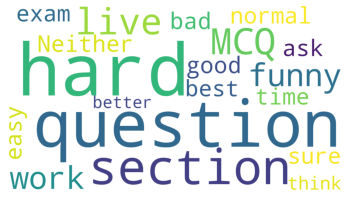

In [411]:
wc = WordCloud(background_color = 'white', width = 1920, height = 1080)
wc.generate_from_text(text_overall)
plt.imshow(wc)
plt.axis("off")

# Visualize Attendance  

In [416]:
attendance = int(input("Enter attendance percentage:"))

Enter attendance percentage:60


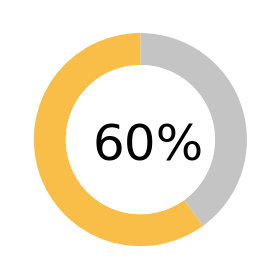

In [417]:
# Pie chart
sizes = [attendance,100-attendance]
#colors
colors = ["#F8BE48",'#c4c4c4']
#explsion
#explode = (0.05,0.05,0.05,0.05)
 
plt.pie(sizes, colors = colors, startangle=90, pctdistance=0.85) #autopct='%1.1f%%'
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
fig.gca().add_artist(centre_circle)
plt.text(0.28, 0.45, str(attendance)+'%', fontsize=50, horizontalalignment='center',
         verticalalignment='center', transform=ax.transAxes)

# Equal aspect ratio ensures that pie is drawn as a circle
#ax1.axis('equal')  
plt.tight_layout()
plt.show()
